In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
from matplotlib.pyplot import MultipleLocator
from matplotlib import rcParams
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D



In [5]:
J = 1
d = 0.01
MU = np.arange(-1.5, 1.5, d)
MU = MU.flatten()
delta_list = np.arange(-0.4,0.4,0.12)
Delta = 0.6

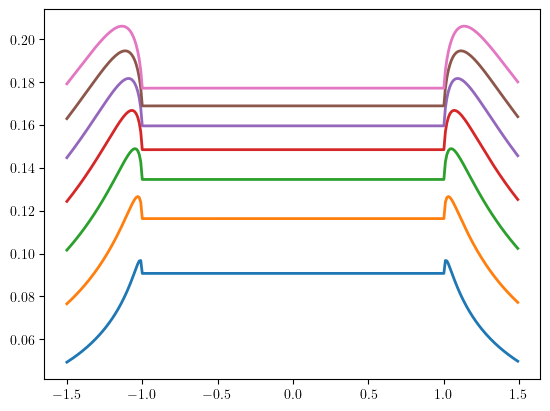

In [6]:
O = np.zeros((np.size(MU),np.size(delta_list)))
N = 4000
kappa = 0
k = np.arange(2 * np.pi / N, np.pi - 2 * np.pi / N, 2 * np.pi / N)

step_delta = 0
total_step_mu = len(MU)
total_step_delta = len(delta_list)
while step_delta< total_step_delta:
    step_mu = 0
    while step_mu < total_step_mu:
        mu = MU[step_mu]
        delta = delta_list[step_delta]

        A =( (Delta+delta)*np.sin(k)*(mu- J *np.cos(k))/((delta**2+Delta*delta)*np.sin(k)**2))* \
(1-np.sqrt(((mu-J *np.cos(k))**2+(Delta**2-delta**2)*np.sin(k)**2)/(+(mu-J*np.cos(k))**2+(Delta+delta)**2*np.sin(k)**2)))
        O[step_mu,step_delta] = np.sum(np.abs(A)) / N
        step_mu +=1
    step_delta +=1
for i in range(7):
    plt.plot(MU[:], O[:,i],lw = 2)
# label = axs[2].legend(loc=1, bbox_to_anchor=(1.5,1), prop={'size': font_size-5}, shadow=True, handleheight=0.5, handlelength=0.8)



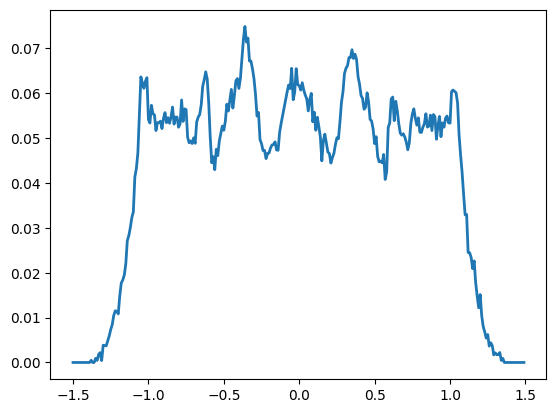

In [36]:
plt.plot(MU[:], O[:,4],lw = 2)

/var/folders/_6/0kk73yx927x6htqwlt_crj_w0000gn/T/ipykernel_6429/1773060166.py:20: RuntimeWarning: divide by zero encountered in divide
  Y = (E /np.tan(E*t)-2*1j*(mu-J*np.cos(k))  )
/opt/anaconda3/envs/python39/lib/python3.9/site-packages/numpy/linalg/_linalg.py:2772: RuntimeWarning: invalid value encountered in multiply
  s = (x.conj() * x).real
/var/folders/_6/0kk73yx927x6htqwlt_crj_w0000gn/T/ipykernel_6429/1773060166.py:23: RuntimeWarning: invalid value encountered in divide
  psi_normalized = PSI / norms


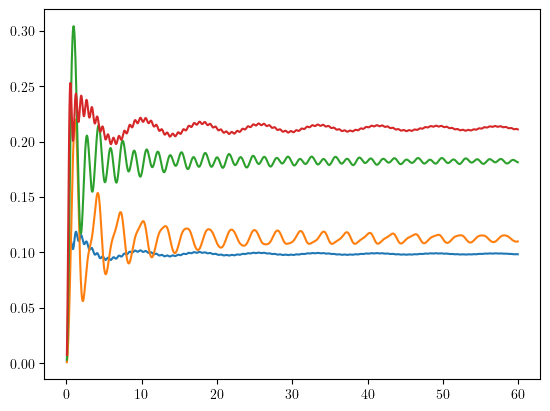

In [7]:
mu_range = [[1.2, -0.3], [0, -0.3], [0, 0.4], [1.2, 0.4]]
Time_range = np.arange(0, 60, 0.05)
time_length = len(Time_range)
N = 1000
zetaT = np.zeros((time_length, 4))
zetaT_average = np.zeros((time_length, 4))
O_y = np.array([[0,1j],[-1j,0]]) 
dappa = 0
k = np.arange(2 * np.pi / N, np.pi - 2 * np.pi / N, 2 * np.pi / N)
step_md = 0

while step_md<4:
    [mu,delta] = mu_range[step_md]
    E = 2*np.sqrt(((J*np.cos(k)-mu)**2+(Delta**2-delta**2)*np.sin(k)**2))
    step_time = 0
    while step_time < time_length:
        t = Time_range[step_time]
        
        X = 2*(Delta + delta)*np.sin(k)
        Y = (E /np.tan(E*t)-2*1j*(mu-J*np.cos(k))  )  
        PSI = np.vstack((X,Y))
        norms = np.linalg.norm(PSI, axis=0)
        psi_normalized = PSI / norms
        PSI_conj = np.conj(psi_normalized).T
        E_list = np.diag(np.dot(PSI_conj,np.dot(O_y,psi_normalized))).real
        E2_list = 2*(delta+Delta)*np.sin(k)*(mu-J*np.cos(k))*np.sin(E*t)**2/((J*np.cos(k)-mu)**2 + (Delta**2+delta*Delta)*np.sin(k)**2\
                                                                        -(delta*Delta+delta**2)*np.sin(k)**2*np.cos(2*E*t))
        zetaT[step_time, step_md] = np.sum(np.abs(E_list)) / N 
        # zetaT_average [step_time, step_md] = np.sum(zetaT[:, step_md])/(step_time+1)
        step_time = step_time + 1
    step_md +=1

plt.plot(Time_range[:],zetaT[:,:])

In [6]:
zetaT[-1,1]

np.float64(0.10992372927541337)

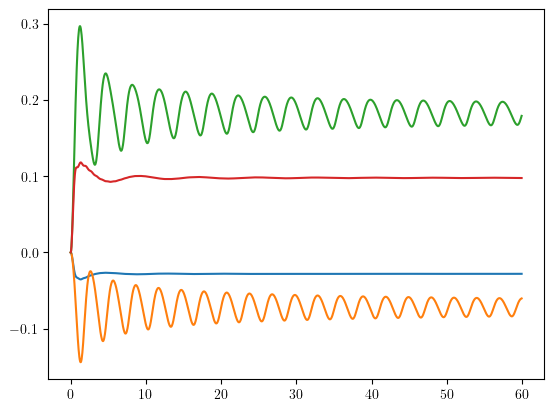

In [8]:


N = 1000
P = np.zeros((time_length, 4))
zetaT_average = np.zeros((time_length, 4))

dappa = 0
k = np.arange(0, np.pi, 2 * np.pi / N)
step_md = 0

while step_md<4:
    [mu,delta] = mu_range[step_md]
    # delta = 0.0
    a = (delta+Delta)**2 * np.sin(k)**2 + (J*np.cos(k)-mu)**2

    E = 2*np.sqrt(((J*np.cos(k)-mu)**2+(Delta**2-delta**2)*np.sin(k)**2))
    
    step_time = 0
    while step_time < time_length:
        t = Time_range[step_time]
        PK = np.log(np.cos(E*t)**2 + a/ (E/2)**2 *np.sin(E*t)**2)
        P[step_time, step_md] = np.sum(PK)/N 
        
        step_time = step_time + 1
    step_md +=1
plt.plot(Time_range,P[:,:])

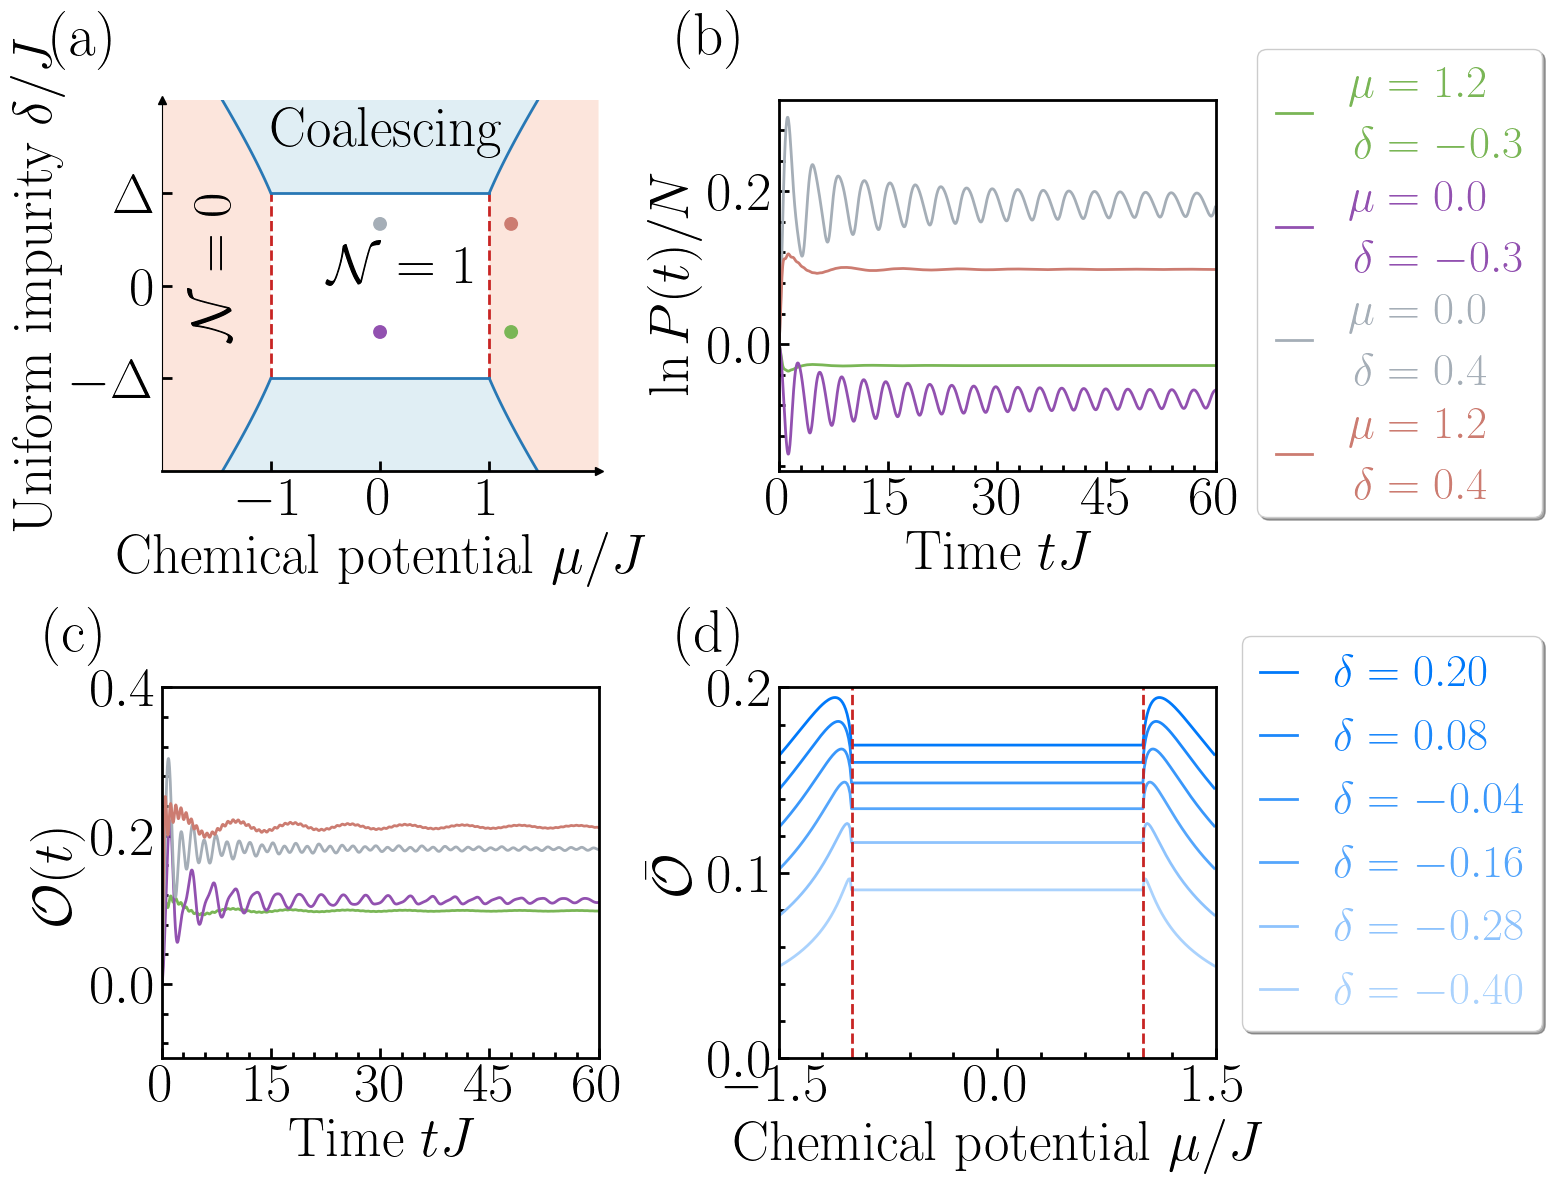

In [12]:
plt.rcParams.update({
    "text.usetex": True,             # 启用 LaTeX 渲染
    "font.family": "serif",          # sans-serif:标题不会改成latex字体serif:标题会变成latex
    "font.serif": ["Computer Modern"],  # 使用 Computer Modern 字体
    "text.latex.preamble": r"\usepackage{amsmath}"  # 如果需要数学包
})
font_size = 40
C1 = ['#2878B5','#9AC9DB','#F8AC8C', '#C82423']
C2 = ['#7AB656','#9251B0','#A5AEB7', '#CC7C71']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17, 12))
C = ['#0079fa','#1c88fb','#3997fb','#55a6fc','#8ec3fd','#aad2fd']


X = [1.2,0,0,1.2]
Y = [-0.3,-0.3,0.4,0.4]
# axs[0].scatter(X, Y,s =50,c = C2,linewidths=0,edgecolors='k', zorder=2)


gList1 = np.linspace(-1, -1, num=200)
gList2 = np.linspace(1, 1, num=200)
gList3 = np.linspace(-1, 1, num=200)
temp1 = np.linspace(-Delta, Delta, num=200)
temp2 = np.linspace(Delta, Delta, num=200)

mu_list = np.linspace(1,2,100)
up = np.linspace(2, 2, 100)
delta_list1 = np.zeros(100,)
delta_list2 = np.ones(100,)*Delta
for mu in mu_list:
    delta_list1 = np.sqrt(mu_list**2+Delta**2-1)

axs[0,0].scatter(X, Y,s =100 ,c = C2,linewidths=0,edgecolors='k', zorder=2)
axs[0,0].spines["left"].set_position(("data", -2))
axs[0,0].spines["bottom"].set_position(("data", -1.2))
axs[0,0].spines['right'].set_color('none')
axs[0,0].spines['top'].set_color('none')

axs[0,0].plot(gList1, temp1, lw=2, c=C1[3],ls = '--', alpha=1)
axs[0,0].plot(gList2, temp1, lw=2, c=C1[3],ls = '--', alpha=1)

axs[0,0].plot(gList3, temp2, lw=2, c=C1[0], alpha=1)
axs[0,0].plot(gList3, -temp2, lw=2, c=C1[0], alpha=1)

axs[0,0].plot(mu_list, delta_list1, lw=2, c=C1[0], alpha=1)
axs[0,0].plot(mu_list, -delta_list1, lw=2, c=C1[0], alpha=1)
axs[0,0].plot(-mu_list, delta_list1, lw=2, c=C1[0], alpha=1)
axs[0,0].plot(-mu_list, -delta_list1, lw=2, c=C1[0], alpha=1)
# for i in range(6):
#     axs[0,0].plot(MU[:], Delta[5-i]*np.ones([len(MU)]),lw = 2, color=C[i])
axs[0,0].fill_between(mu_list,-delta_list1,delta_list1, facecolor=C1[2], alpha=0.3)
axs[0,0].fill_between(-mu_list,-delta_list1,delta_list1, facecolor=C1[2], alpha=0.3)
axs[0,0].text(-0.5, 0, '$\mathcal{N}=1$', fontsize=font_size)
axs[0,0].text(-1.0, 0.9, 'Coalescing', fontsize=font_size)
axs[0,0].text(-1.7, -0.3, '$\mathcal{N}=0$', fontsize=font_size, rotation=90)

YY = np.hstack((delta_list1[::-1], temp2, delta_list1))

XX = np.hstack((-mu_list[::-1],gList3,mu_list))

YY2 = np.ones(np.shape(XX))*2
axs[0,0].fill_between(XX,YY,YY2 ,facecolor=C1[1], alpha=0.3)
axs[0,0].fill_between(XX,-YY2,-YY ,facecolor=C1[1], alpha=0.3)

# axs[0,0].axvspan(-1, 1,0.5,1, facecolor=C1[0], alpha=1)
# axs[0,0].axvspan(-1, 1,0,0.5, facecolor=C1[1], alpha=0.3)

# axs[0,0].text(1.5, 0.2, 'a', fontsize=font_size)
# axs[0,0].text(0, 0.2, 'b', fontsize=font_size)
# axs[0,0].text(0, 1.8, 'c', fontsize=font_size)
# axs[0,0].text(1.5, 1.8, 'd', fontsize=font_size)
axs[0,0].set_xlim(-2, 2)
axs[0,0].set_ylim(-1.2, 1.2)
axs[0,0].set_xticks([-1,0,1])
axs[0,0].set_yticks([-Delta,0,Delta])
axs[0,0].set_xticklabels([r'$-1$',r'$0$',r'$1$'], fontsize=font_size)
axs[0,0].set_yticklabels([r'$-\Delta$',r'$0$',r'$\Delta$'], fontsize=font_size)
axs[0,0].set_xlabel('Chemical potential $\mu/J$', fontsize = font_size)
axs[0,0].set_ylabel('Uniform impurity $\delta/J$', fontsize = font_size)
axs[0,0].plot(2, -1.2, ">k", clip_on=False)
axs[0,0].plot(-2, 1.2, "^k", clip_on=False)
axs[0,0].tick_params(which='minor',direction='in', length=4,width=2,axis = "both")
axs[0,0].tick_params(which='major',direction='in', length=7,width=2,labelsize=font_size,axis = "both")
axs[0,0].spines['bottom'].set_linewidth(2)
axs[0,0].spines['top'].set_linewidth(2)

p1, = axs[0,1].plot(Time_range,P[:,0],c = C2[0],lw = 2, label=r"$\begin{aligned} \mu &=%.1f \\ \delta &= %.1f \end{aligned}$"%(mu_range[0][0],mu_range[0][1]))
p2, = axs[0,1].plot(Time_range,P[:,1],c = C2[1],lw = 2, label=r"$\begin{aligned}\mu &=%.1f \\ \delta &= %.1f\end{aligned}$"%(mu_range[1][0],mu_range[1][1]))
p3, = axs[0,1].plot(Time_range,P[:,2],c = C2[2],lw = 2, label=r"$\begin{aligned}\mu &=%.1f \\ \delta &= %.1f\end{aligned} $"%(mu_range[2][0],mu_range[2][1]))
p4, = axs[0,1].plot(Time_range,P[:,3],c = C2[3],lw = 2, label=r"$\begin{aligned}\mu &=%.1f \\ \delta &= %.1f\end{aligned} $"%(mu_range[3][0],mu_range[3][1]))
axs[0,1].xaxis.set_major_locator(MultipleLocator(15))
axs[0,1].yaxis.set_major_locator(MultipleLocator(0.2))
axs[0,1].xaxis.set_minor_locator(MultipleLocator(3))
axs[0,1].yaxis.set_minor_locator(MultipleLocator(0.04))
axs[0,1].set_xlabel(r'Time $tJ $', size=font_size)
axs[0,1].set_ylabel(r'${\ln {P}}(t)/N $', size=font_size)
axs[0,1].tick_params(labelsize=font_size)

axs[0,1].set_xlim([0,60])
label = axs[0,1].legend( loc=1, bbox_to_anchor=(1.8,1.2), prop={'size': font_size - 7},ncol=1,   shadow=True, handleheight=0.5, handlelength=0.8)
x = 0
for text in label.get_texts():
    text.set_color(C2[x])
    x +=1
# axs[1,0].add_artist(label)

p1, = axs[1,0].plot(Time_range,zetaT[:,0],c = C2[0],lw = 2, label="$\mu =%.1f,\delta = %.1f $"%(mu_range[0][0],mu_range[0][1]))
p2, = axs[1,0].plot(Time_range,zetaT[:,1],c = C2[1],lw = 2, label="$\mu =%.1f,\delta = %.1f $"%(mu_range[1][0],mu_range[1][1]))
p3, = axs[1,0].plot(Time_range,zetaT[:,2],c = C2[2],lw = 2, label="$\mu =%.1f,\delta = %.1f $"%(mu_range[2][0],mu_range[2][1]))
p4, = axs[1,0].plot(Time_range,zetaT[:,3],c = C2[3],lw = 2, label="$\mu =%.1f,\delta = %.1f $"%(mu_range[3][0],mu_range[3][1]))
axs[1,0].xaxis.set_major_locator(MultipleLocator(15))
axs[1,0].yaxis.set_major_locator(MultipleLocator(0.2))
axs[1,0].xaxis.set_minor_locator(MultipleLocator(3))
axs[1,0].yaxis.set_minor_locator(MultipleLocator(0.04))
axs[1,0].set_xlabel(r'Time $tJ $', size=font_size)
axs[1,0].set_ylabel(r'${\mathcal{O}}(t) $', size=font_size)
axs[1,0].tick_params(labelsize=font_size)
# label = axs[1,0].legend([p1,p2], ["$\mu =%.1f,\Delta = %.1f $"%(mu_range[0][0],mu_range[0][1]),"$\mu =%.1f,\Delta = %.1f $"%(mu_range[1][0],mu_range[1][1])]\
#                     ,loc='upper right' , prop={'size': font_size-3}, shadow=True, handleheight=0.5, handlelength=0.8)

# label = axs[1,0].legend( loc=1, bbox_to_anchor=(1.5,1), prop={'size': font_size - 5},ncol=1,   shadow=True, handleheight=0.5, handlelength=0.8)
# for text in label.get_texts():
#     text.set_color(C2[x])
#     x +=1
# axs[1,0].add_artist(label)
# label =axs[1,0].legend([p3,p4], ["$\mu =%.1f,\Delta = %.1f $"%(mu_range[2][0],mu_range[2][1]),"$\mu =%.1f,\Delta = %.1f $"%(mu_range[3][0],mu_range[3][1])]\
                #   ,loc='lower right', prop={'size': font_size-3}, shadow=True, handleheight=0.5, handlelength=0.8)
# x = 0
# for text in label.get_texts():
#     text.set_color(C2[x+2])
#     x +=1

axs[1,0].set_ylim([-0.1,0.4])
axs[1,0].set_xlim([0,60])



for i in range(6):
    axs[1,1].plot(MU[:], O[:,i],lw = 2, label="$\delta =%.2f $"%(delta_list[i]), color=C[5-i])

handles, labels = axs[1,1].get_legend_handles_labels()

# 倒序并设置 legend
label = axs[1,1].legend(handles[::-1], labels[::-1], loc=1, bbox_to_anchor=(1.8,1.2), prop={'size': font_size - 7},ncol=1,   shadow=True, handleheight=0.5, handlelength=0.8)
x = 0
for text in label.get_texts():
    text.set_color(C[x])
    x +=1
axs[1,1].xaxis.set_major_locator(MultipleLocator(1.5))
axs[1,1].yaxis.set_major_locator(MultipleLocator(0.1))
axs[1,1].xaxis.set_minor_locator(MultipleLocator(0.3))
axs[1,1].yaxis.set_minor_locator(MultipleLocator(0.02))
axs[1,1].set_ylabel(r'$\bar{\mathcal{O}} $', size=font_size)
axs[1,1].set_xlabel(r'Chemical potential $\mu / J$', size=font_size)
axs[1,1].tick_params(labelsize=font_size)

axs[1,1].set_ylim([0,0.2])
axs[1,1].set_xlim([-1.5,1.5])

y = np.linspace(0,0.2,10)
x = -1*np.ones([1,10])
x = x.flatten()
axs[1,1].plot(x,y,ls = '--',lw = 2,color = C1[3])
y = np.linspace(0,0.2,10)
x = 1*np.ones([1,10])
x = x.flatten()
axs[1,1].plot(x,y,ls = '--',lw = 2,color = C1[3])
for i in [1,2,3]:
    x,y = divmod(i, 2)
    axs[x,y].tick_params(which='minor',direction='in', length=4,width=2,axis = "both")
    axs[x,y].tick_params(which='major',direction='in', length=7,width=2,labelsize=font_size,axis = "both")
    axs[x,y].spines['bottom'].set_linewidth(2)
    axs[x,y].spines['top'].set_linewidth(2)
    axs[x,y].spines['right'].set_linewidth(2)
    axs[x,y].spines['left'].set_linewidth(2)
# plt.subplots_adjust(wspace=0.3, hspace =0.4)
x1 = -3
y1 = 1.1
x2 = 0.25
axs[0,0].text(-3, 1.5, '(a)', fontsize=font_size + 3)
axs[0,1].text(-14, 0.38, '(b)', fontsize=font_size + 3)
axs[1,0].text(-16, 0.45, '(c)', fontsize=font_size + 3)
axs[1,1].text(-2.2, 0.22, '(d)', fontsize=font_size + 3)
plt.tight_layout()

plt.savefig('fig3.pdf',transparent = True,bbox_inches = 'tight')

## fig3

In [9]:
YY,YY2

(array([1.83303028, 1.82200384, 1.8109666 , 1.79991837, 1.78885894,
        1.77778811, 1.76670565, 1.75561135, 1.74450498, 1.73338631,
        1.7222551 , 1.71111111, 1.69995409, 1.68878377, 1.67759989,
        1.66640218, 1.65519036, 1.64396414, 1.63272322, 1.6214673 ,
        1.61019606, 1.59890918, 1.58760632, 1.57628714, 1.56495129,
        1.5535984 , 1.5422281 , 1.53083999, 1.51943368, 1.50800875,
        1.49656478, 1.48510133, 1.47361794, 1.46211415, 1.45058946,
        1.43904337, 1.42747538, 1.41588493, 1.40427147, 1.39263444,
        1.38097322, 1.36928721, 1.35757576, 1.34583821, 1.33407387,
        1.32228202, 1.31046193, 1.29861282, 1.28673389, 1.27482431,
        1.26288321, 1.25090968, 1.23890279, 1.22686155, 1.21478495,
        1.20267192, 1.19052135, 1.17833208, 1.16610289, 1.15383251,
        1.14151962, 1.12916282, 1.11676066, 1.10431161, 1.09181407,
        1.07926634, 1.06666667, 1.05401318, 1.04130392, 1.02853681,
        1.01570968, 1.00282022, 0.98986601, 0.97

In [10]:
E

array([0.4       , 0.40007895, 0.40031572, 0.40071009, 0.40126165,
       0.40196988, 0.40283409, 0.40385344, 0.40502697, 0.40635356,
       0.40783199, 0.40946089, 0.4112388 , 0.41316413, 0.41523522,
       0.41745029, 0.41980748, 0.42230488, 0.42494048, 0.42771225,
       0.43061807, 0.43365581, 0.43682329, 0.44011831, 0.44353864,
       0.44708205, 0.4507463 , 0.45452915, 0.45842836, 0.46244172,
       0.46656701, 0.47080204, 0.47514467, 0.47959274, 0.48414416,
       0.48879686, 0.49354881, 0.49839801, 0.50334251, 0.5083804 ,
       0.51350983, 0.51872895, 0.52403601, 0.52942926, 0.53490702,
       0.54046767, 0.54610959, 0.55183126, 0.55763117, 0.56350787,
       0.56945995, 0.57548604, 0.58158483, 0.58775503, 0.5939954 ,
       0.60030476, 0.60668195, 0.61312584, 0.61963536, 0.62620948,
       0.63284717, 0.63954747, 0.64630944, 0.65313218, 0.66001481,
       0.66695649, 0.6739564 , 0.68101377, 0.68812782, 0.69529782,
       0.70252308, 0.70980291, 0.71713664, 0.72452365, 0.73196